In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Import libraries
from scipy import stats
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set(style="ticks", color_codes=True)
%matplotlib inline
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score

# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# missing data
def find_missing_data(df):
    #missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    if missing_data['Total'].max() > 0: print (missing_data.head(20))
    else: print ("No missing data.")

# Load Data and Explore 

In [2]:
!pip install -q xlrd
!git clone https://github.com/juggernautTress/EWeiss-Data.git

fatal: destination path 'EWeiss-Data' already exists and is not an empty directory.


In [3]:

# Input data files are available in the "Eweiss-Data/" directory.
bckgrnd = pd.read_excel('EWeiss-Data/UC1.xlsx', 'Background', index_col=None)
flwseeds = pd.read_excel('EWeiss-Data/UC1.xlsx', 'Data', index_col=None)
# bckgrnd.dropna(axis=0, how='all') #remve all row where all value is 'NaN' exists
# Any results will be writen to the current directory are saved as output.
flwseeds.head() ## Nominal / Categorical Data

,Unnamed: 0,STORE CODE,Ageratum Blue,Alyssum Purple,Alyssum White,Alyssum Yellow,Anthurium Mix,Aster Blue,Aster Double Mix,Barcome Mix Calendula Orange,...,Poppy Red,Rudbeckia,Stock Mix,Stock White,Sweet Pea Mix,Sweet Pea Pink,Sweet Pea Red,Sweet Pea White,Sweet Sultan,Sweet William
0,NaN,1101,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
1,NaN,1153,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
2,NaN,1228,1,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
3,NaN,1283,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0
4,NaN,1305,0,0,0,1,1,0,0,0,...,0,0,0,0,1,1,1,1,0,0


In [4]:
flwseeds = flwseeds.drop(["Unnamed: 0"], axis=1)
flwseeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 57 columns):
STORE CODE                           1601 non-null int64
Ageratum Blue                        1601 non-null int64
Alyssum Purple                       1601 non-null int64
Alyssum White                        1601 non-null int64
Alyssum Yellow                       1601 non-null int64
Anthurium Mix                        1601 non-null int64
Aster Blue                           1601 non-null int64
Aster Double Mix                     1601 non-null int64
Barcome Mix Calendula Orange         1601 non-null int64
Calendula Gold                       1601 non-null int64
Candytuft Mix Carnation Red          1601 non-null int64
Candytuft White                      1601 non-null int64
Carnation Mix                        1601 non-null int64
Carnation Yellow Carnations White    1601 non-null int64
Cereopsis                            1601 non-null int64
Chrysanthemum Mix                    1

*Check for missing data*

In [5]:
draw_missing_data_table(flwseeds) ## None

,Total,Percent
Sweet William,0,0.0
Holly Hock,0,0.0
Gypsophila White,0,0.0
Godetia,0,0.0
Gazania Mix,0,0.0
Flowering Kale Mix,0,0.0
Delphinium,0,0.0
Daisy White,0,0.0
Cornflower Mix,0,0.0
Cleome Rose,0,0.0


In [6]:
flwseeds["STORE CODE"].unique().size ## all unique store codes

1601

*Distribution Plots*

In [7]:
initStats = flwseeds.describe()
initStats = initStats.drop(columns =["STORE CODE"])
initStats

,Ageratum Blue,Alyssum Purple,Alyssum White,Alyssum Yellow,Anthurium Mix,Aster Blue,Aster Double Mix,Barcome Mix Calendula Orange,Calendula Gold,Candytuft Mix Carnation Red,...,Poppy Red,Rudbeckia,Stock Mix,Stock White,Sweet Pea Mix,Sweet Pea Pink,Sweet Pea Red,Sweet Pea White,Sweet Sultan,Sweet William
count,1601.000000,1601.000000,1601.000000,1601.0,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,...,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,0.086196,0.006871,0.001874,1.0,0.998126,0.001874,0.000625,0.000625,0.999375,0.514678,...,0.003748,0.003748,0.000625,0.000625,0.981262,0.978139,0.607745,0.971268,0.002498,0.008120
std,0.280741,0.082630,0.043261,0.0,0.043261,0.043261,0.024992,0.024992,0.024992,0.499941,...,0.061122,0.061122,0.024992,0.024992,0.135642,0.146276,0.488406,0.167105,0.049937,0.089772
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,mean,std,count,Name
36,0.003748,0.061122,6,Poppy Red
37,0.003748,0.061122,6,Marigold Red Jafri
38,0.003748,0.061122,6,Rudbeckia
39,0.003123,0.055814,5,Petunia Double Mix
40,0.002498,0.049937,4,Sweet Sultan
41,0.002498,0.049937,4,Phlox Mix
42,0.001874,0.043261,3,Alyssum White
43,0.001874,0.043261,3,Aster Blue
44,0.001874,0.043261,3,Carnation Mix
45,0.001874,0.043261,3,Linum Red


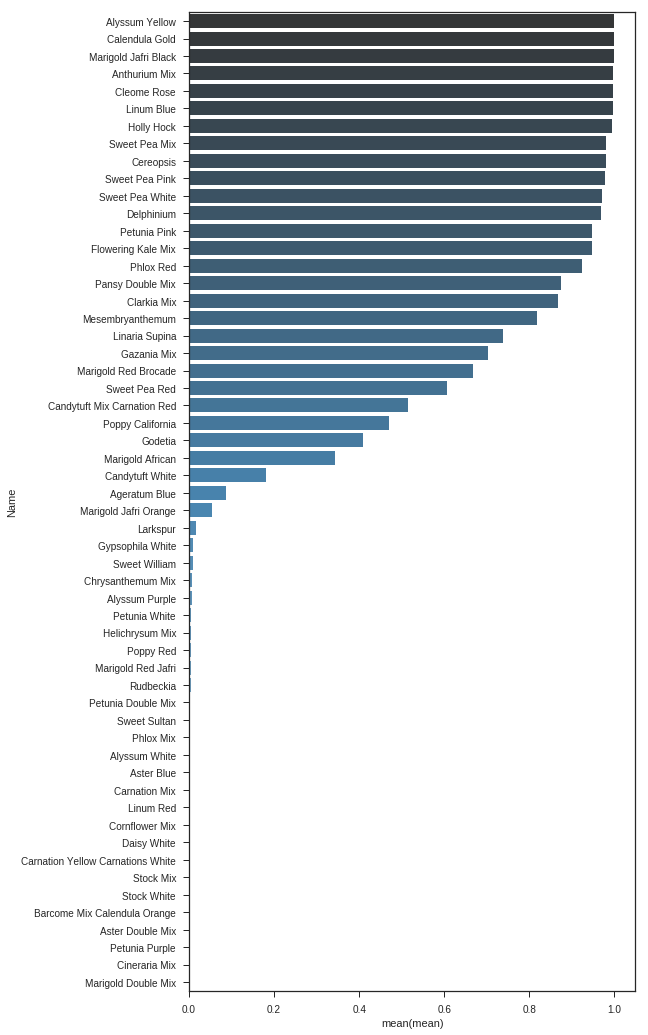

In [8]:
flw_names = list(flwseeds.columns.values)[1:]

initStats = pd.DataFrame(columns=["mean","std"])
initStats["mean"]=flwseeds.drop(columns =["STORE CODE"]).mean();
initStats["std"]=flwseeds.drop(columns =["STORE CODE"]).std();
initStats["count"]=flwseeds.drop(columns =["STORE CODE"]).sum();
initStats["Name"]=flw_names
# sort df by Count column
initStats = initStats.sort_values(['mean'], ascending=False).reset_index(drop=True)

f, ax = plt.subplots(figsize=(8, 18))
sns.barplot(initStats["mean"],initStats.Name,palette="Blues_d")

# print ("Most uncommon seeds: \n",initStats.tail(20))
initStats.tail(20)

Everybody orders Alyssum Y. and more than 95% order Calendula Gold, Marigold Jafri Black, Anthurium Mix, Cleome Rose, Linum Blue, Holly Hock, Sweet Pea Mix, Cereopsis, Sweet Pea Pink, Sweet Pea White and Delphinium. The rest of the flowers on the list would benefit most from sale recommendations.

*Correlation Matrix*

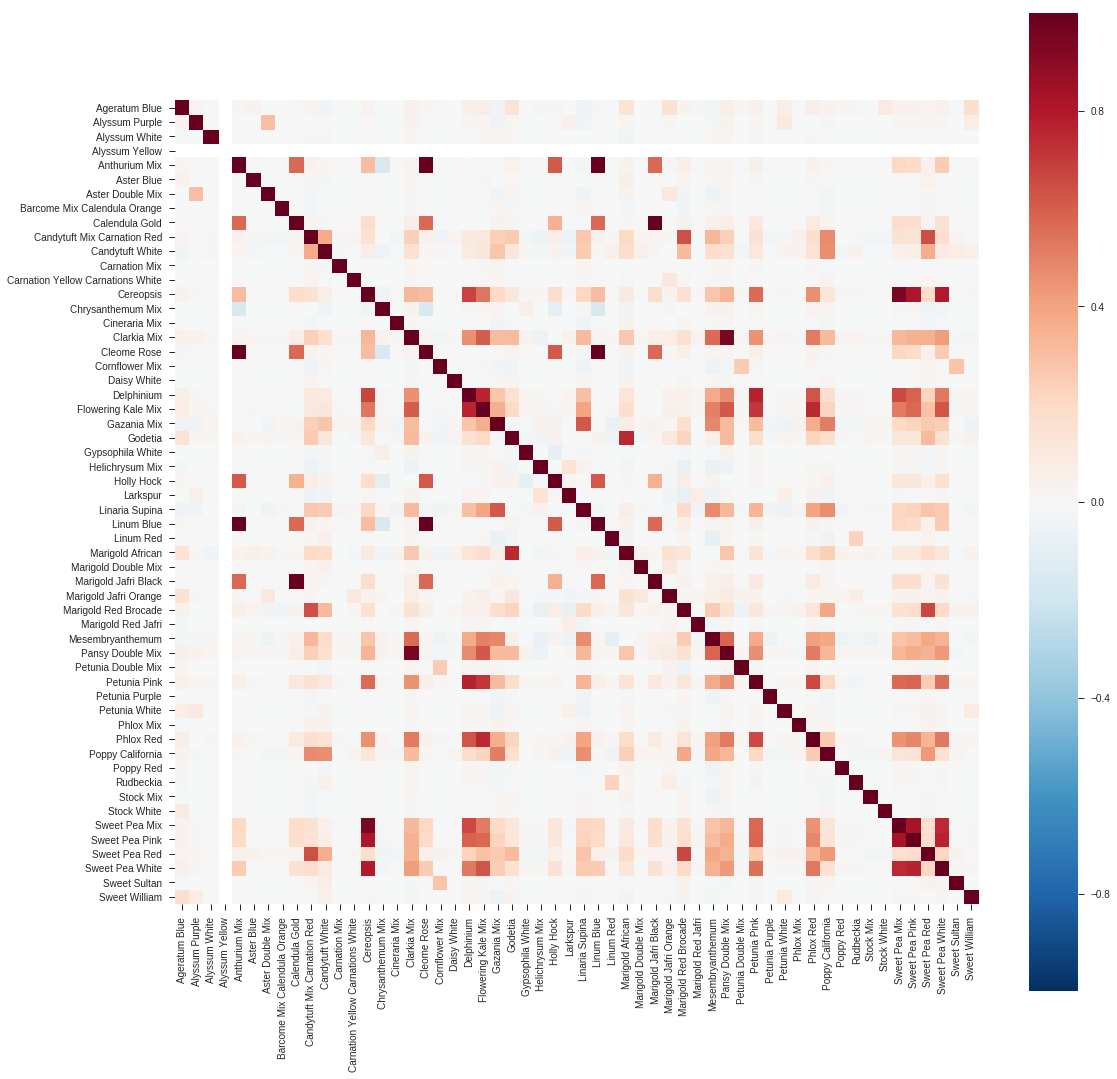

In [9]:
flw_train = flwseeds.loc[:,flw_names]
corrmat = flw_train.corr(method='pearson')
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, square=True)#,annot=True);

# 1. Recommendations based on **Pearsons' R** values or Store Similarity in buying seeds

In [0]:
#print(initStats.loc[initStats['Name'] == "Marigold Jafri Black"]["mean"].values[0] )
def recommend(FlowerName, min_count):
    print("For a store that buys the ({}) seed :".format(FlowerName))
    print("- Top 10 seed recommendation based on Pearsons'R correlation - ")

    target = flw_train[FlowerName]
    similar_to_target = flw_train.corrwith(target)
    corr_target = pd.DataFrame(similar_to_target, columns = ['PearsonR'])
    corr_target.dropna(inplace = True)
    corr_target = corr_target.sort_values('PearsonR', ascending = False)
    popularity = []
    for idx in corr_target.index.values:
        popularity.append(initStats.loc[initStats["Name"] == idx]["mean"].values[0] *100.)
    corr_target['Popularity (Seed Sale %)'] = popularity
    print(corr_target.head(10))    
    

In [17]:
recommend("Calendula Gold", 10) #popular seed

For a store that buys the (Calendula Gold) seed :
- Top 10 seed recommendation based on Pearsons'R correlation - 
                      PearsonR  Popularity (Seed Sale %)
Marigold Jafri Black  1.000000                 99.937539
Calendula Gold        1.000000                 99.937539
Anthurium Mix         0.576989                 99.812617
Cleome Rose           0.576989                 99.812617
Linum Blue            0.576989                 99.812617
Holly Hock            0.352779                 99.500312
Sweet Pea Mix         0.180912                 98.126171
Cereopsis             0.177914                 98.063710
Sweet Pea Pink        0.167225                 97.813866
Sweet Pea White       0.145354                 97.126796


In [21]:
recommend("Petunia Purple", 10) # uncommon seed

For a store that buys the (Petunia Purple) seed :
- Top 10 seed recommendation based on Pearsons'R correlation - 
                      PearsonR  Popularity (Seed Sale %)
Petunia Purple        1.000000                  0.062461
Sweet Pea Red         0.020085                 60.774516
Marigold Red Brocade  0.017636                 66.770768
Clarkia Mix           0.009767                 86.758276
Pansy Double Mix      0.009500                 87.382886
Phlox Red             0.007180                 92.379763
Flowering Kale Mix    0.005920                 94.690818
Petunia Pink          0.005809                 94.878201
Delphinium            0.004489                 96.876952
Sweet Pea White       0.004300                 97.126796


In [0]:
## if you want to correlate more than one item: 
##      eg. A store that bought both Petunia Purple and Calendula Gold 
##   must recalculate correlation based on that "grouping" 
##>>> inefficient for large data 

# 2. Nearest Neighbours based clustering of common stores ( User-based collaborative filtering)

In [0]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.2, random_state=0)
X= flwseeds.drop(columns=['STORE CODE'])
split_index = rs.split(X)
train_index, test_index = list(split_index)[0]
X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
neigh = NearestNeighbors().fit(X_train)

In [0]:
from numpy.random import choice as sample
def hide_seeds(ori_vector=None,fraction_to_hide=0.4):
  seeds_bought = list(ori_vector.columns[(ori_vector ==1).iloc[0]])
  num_of_purchases = len(seeds_bought)
  if num_of_purchases == 1: 
    print ("Need more than one purchase")
    return None
  num_2hide = int(num_of_purchases * fraction_to_hide)
  if num_2hide < 1: num_2hide =1 #at least one hidden
  if num_2hide == num_of_purchases: num_2hide -= 1 #at least one purchase

  seeds_hidden = sample(seeds_bought,num_2hide,replace=False)
  ori_vector[seeds_hidden] = 0
  return ori_vector, seeds_hidden


In [127]:
#example query
store_query =  X_test.sample(1)# new store 
Store_consumption_ori = store_query.columns[(store_query == 1).iloc[0]]
## hide a few purchases for testing purposes
store_query, test_recommn = hide_seeds(store_query,0.3)
## test the query:
#1. find stores with similar purchases as the query:
neighbours = neigh.kneighbors(store_query, return_distance=False)
#2. get purchases by these users and sort by affinity
#DF: store seed affinity scores
seedAffinity= pd.DataFrame(columns=['score'])
store_set = X_train.loc[neighbours[0]]
store_set = store_set.loc[:, store_set.any()] ## drop zero columns
score = store_set.sum(axis=0).astype(float)/neighbours[0].size

print (" For a store that bought -- ",\
list(store_query.columns[(store_query == 1).iloc[0]]), "\n\n Recommendation \t\t Score\n\n",\
score.sort_values(ascending=False))




 For a store that bought --  ['Anthurium Mix', 'Calendula Gold', 'Cereopsis', 'Cleome Rose', 'Marigold Jafri Black', 'Marigold Red Brocade', 'Sweet Pea Mix', 'Sweet Pea Pink', 'Sweet Pea White'] 

 Recommendation 		 Score

 Alyssum Yellow                 1.0
Linum Blue                     1.0
Anthurium Mix                  1.0
Calendula Gold                 1.0
Cleome Rose                    1.0
Holly Hock                     1.0
Marigold Jafri Black           1.0
Cereopsis                      0.8
Clarkia Mix                    0.8
Delphinium                     0.8
Flowering Kale Mix             0.8
Sweet Pea White                0.8
Mesembryanthemum               0.8
Pansy Double Mix               0.8
Phlox Red                      0.8
Sweet Pea Mix                  0.8
Sweet Pea Pink                 0.8
Petunia Pink                   0.6
Sweet Pea Red                  0.4
Marigold Red Brocade           0.4
Gazania Mix                    0.4
Poppy California               0.4
Candyt

In [121]:
#3. compare to test:
print(test_recommn) ## implement >> recomm with these scores

['Sweet Pea Mix' 'Sweet Pea White' 'Sweet Pea Pink' 'Cereopsis'
 'Marigold Red Brocade' 'Anthurium Mix' 'Marigold African' 'Cleome Rose']


## k- nearest neighbours ( eval based on 'k') can be implemented

To do:
*   score + [ % popularity of seed]
*   total assessment of all test data
*   use Pearson Correlation here??



## Implement SVD

```
`# This is formatted as code`
```

. SVD
* SVD handles the problem of scalability and sparsity posed by CF successfully. However, SVD is not without flaw. The main drawback of SVD is that there is no to little explanation to the reason that we recommend an item to an user. This can be a huge problem if users are eager to know why a specific item is recommended to them.

In [0]:
pass

**Edelweiss wants this recommendation to be statistically correct. They also want to see if this data is meaningful enough to generate some decent recommendation or not. If Kayla says that this data is insufficient, then she needs to validate that with some statistical results. They also would want to see some stores and some seeds where they should focus primarily. Other than this analysis, if the Edelweiss CEO likes the approach, then he would want to do a pilot of a few stores. Kayla should help the CEO to selct store list along with the recommnedations.**